In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Set up data loaders

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Use Matplot lib to see a few data examples

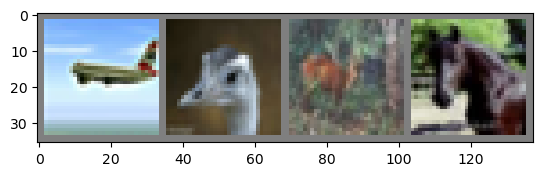

plane bird  deer  horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Let us understand the shapes of the data
First let us look at the images structures

In [5]:
print("images shape: ", images.shape)


images shape:  torch.Size([4, 3, 32, 32])


Images is a batch of 4 images. An each image has a shape of 3 x 32 x 32. Let us look in more detail

In [6]:
temp = images[0]
print("temp: ", temp.shape)

temp:  torch.Size([3, 32, 32])


In [7]:
print("temp.view(-1).shape: ", temp.view(-1).shape)


temp.view(-1).shape:  torch.Size([3072])


In [8]:
print(images.view(-1, 3072).shape)

torch.Size([4, 3072])
